# Kerasを利用したAdversarial Examplesの生成(MNIST, FGSM)

必要なライブラリをインポート

In [2]:
from keras.models import load_model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from tensorboard import notebook

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from importlib import reload

# 自作ライブラリ
import adversarial # Adversarial Examples生成
import model_make # 攻撃対象のCNNを作成
from adversarial  import AdvImg
import model_make as mm
reload(adversarial)
reload(model_make)

Using TensorFlow backend.


<module 'model_make' from '/Users/takumi/workspace/Adversarial-Examples-TF/src/model_make.py'>

## データセット(MNIST)を読み込む

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255. # [0, 255] -> [0, 1]に正規化
x_test = x_test.reshape(-1, 28, 28, 1) / 255.

## 攻撃対象のCNNの読み込み or 学習

In [3]:
# 攻撃対象のCNNの保存先 or 読み込み先
model_path = Path("..", "model_dir")
model_path.mkdir(exist_ok=True)
model_path /= "CNN.h5"

# 学習済みのCNNがあればロード、なければ作成
if model_path.exists():
    model = load_model(str(model_path))
else:
    model = mm.CNN(input_shape=(28, 28, 1)) # MNIST用
    tb = TensorBoard(log_dir="logs")
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
    model.fit(x=x_train, y=y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tb])
    model.save(str(model_path))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# 4枚のAdversarial Examplesを作ってみる

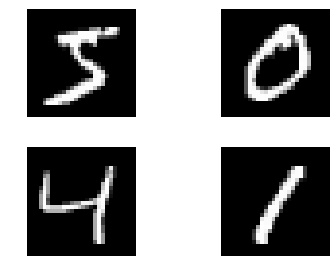

In [23]:
target_img = x_train[0:4].reshape(-1, 28, 28, 1)
target_label = y_train[0:4]

fig = plt.figure()
for i, img in enumerate(target_img):
    plt.subplot(2, 2, i+1)
    plt.imshow(np.squeeze(img), cmap='gray')
    plt.axis('off')

plt.tight_layout()

## Adversarial Examplesの生成

In [ ]:
advgen = AdvImg(model)
advgen.fgsm(x=target_img, y=target_label, epsilon=0.005, num_iter=50)

True label:  [5 0 4 1]


## 補足

In [7]:
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir ./logs/ (started 1 day, 7:24:27 ago; port 6006, pid 46497).
